<a href="https://colab.research.google.com/github/shubhambangotra/project/blob/main/miniprojectImgclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install bing-image-downloader

In [8]:
!mkdir images

In [13]:
from bing_image_downloader import downloader
downloader.download("tree",limit=30,output_dir='images',
                   adult_filter_off=True)




[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://www.thetreecenter.com/wp-content/uploads/sugar-maple-1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.photo-dictionary.com/photofiles/list/9670/13136burning_tree.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.south-florida-plant-guide.com/images/bottlebrush-weeping.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://cdn.homedit.com/wp-content/uploads/2011/11/Christmas-tree-decoration.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.abetterarborist.net/tree_planting_oct_glory_red_maple.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://delawaretrees.com/blog/wp-content/uploads/2013/04/032.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://charlottejoansternberg.com/images/trees/tree_dimly_lit_trees.jpg
[%] File Downloaded !

[%] Downloading Image #8 from http://www.naturesongs.com/vvplants/utahj

In [14]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images= []
flt_data =[]

DATADIR = '/content/images'
CATEGORIES = ['computer images','cricket ball','tree']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    print(img_array.shape)

(205, 260, 3)
(500, 333, 3)
(1024, 1280, 3)
(592, 811, 3)
(512, 512, 4)
(1600, 1121, 3)
(314, 400, 3)
(1246, 2716, 3)
(815, 610, 3)
(815, 610, 3)
(1600, 1121, 3)
(599, 276, 4)
(1024, 1280, 3)
(372, 540, 3)
(314, 400, 3)
(592, 811, 3)
(1246, 2716, 3)
(376, 400, 3)
(376, 400, 3)
(599, 276, 4)
(372, 540, 3)
(376, 400, 3)
(500, 333, 3)
(592, 811, 3)
(372, 540, 3)
(512, 512, 4)
(205, 260, 3)
(314, 400, 3)
(205, 260, 3)
(815, 610, 3)
(324, 590, 3)
(1000, 650, 3)
(1600, 2560, 3)
(599, 413, 3)
(360, 480, 3)
(600, 426, 3)
(1080, 1920, 3)
(1024, 767, 3)
(700, 1000, 3)
(1024, 768, 3)
(600, 426, 3)
(599, 413, 3)
(700, 1000, 3)
(1000, 650, 3)
(350, 280, 3)
(1024, 767, 3)
(1080, 1920, 3)
(1024, 768, 3)
(360, 480, 3)
(324, 590, 3)
(1080, 1920, 3)
(360, 480, 3)
(700, 1000, 3)
(1600, 2560, 3)
(350, 280, 3)
(350, 280, 3)
(600, 337, 4)
(600, 337, 4)
(1024, 768, 3)
(600, 337, 4)
(550, 550, 3)
(700, 466, 3)
(640, 428, 3)
(623, 964, 3)
(381, 300, 3)
(494, 354, 3)
(623, 964, 3)
(640, 480, 3)
(700, 466, 3)
(3

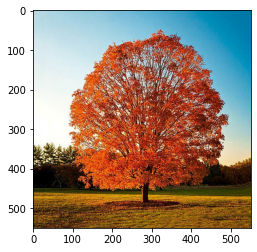

In [16]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images= []
f_data =[]

DATADIR = '/content/images'
CATEGORIES = ['computer images','cricket ball','tree']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    plt.imshow(img_array)
    break

In [34]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images= []
f_data = []

DATADIR = '/content/images'
CATEGORIES = ['computer images','cricket ball','tree']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    f_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
    
f_data = np.array(f_data)
target = np.array(target)
images = np.array(images)   

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(f_data,target,test_size=0.5,random_state=120)

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
prm_grid = [
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,prm_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
y_pred = clf.predict(x_test)
y_pred

array([0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2,
       0])

In [54]:
y_test

array([1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2,
       2, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 2,
       0])

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [56]:
accuracy_score(y_pred,y_test)

0.7777777777777778

In [58]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [59]:
model = pickle.load(open('img_model.p','rb'))

In [66]:
f_data = []
url = input('enter path')
img = imread(url)
img_resized = resize(img,(150,150,3))
f_data.append(img_resized.flatten())
f_data = np.array(f_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(f_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

KeyboardInterrupt: ignored